<a href="https://colab.research.google.com/github/ahshawaf/AML/blob/project2/Project2_Alshawaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we are dealing with MNIST dataset for hand written digit recogniser. we are going to apply Random Forest classifier algorithm for machine learning. Then, reduce the dimensiolity of the dataset by reducing number of features using PCA(Principal component analysis) and t-SNE(t-Distributed Stochastic Neighbor Embedding). After that, re-run the Random Forest Classifier again on the reduced dataset by PCA and t-SNE.

#Load MNIST Data

load the minst data from the keras lib using mnist.load_data(). This method returns splited sets to 60,000 records for training set and 10,000 records for testting set.

In [3]:
from keras.datasets import mnist

(x_train,y_train), (x_test,y_test) = mnist.load_data()

Using TensorFlow backend.


#Explore the MNIST Data

see how many records in the training and testting set

In [4]:
print("Training set size {}".format(x_train.shape))

Training set size (60000, 28, 28)


the training set is 60,000 rows and 784 columns(features)

In [5]:
print("Testing set size {}".format(x_test.shape))

Testing set size (10000, 28, 28)


the testting set is 10,000 rows and each row is 28x28 

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

try to show some images of the data and their coresponding label

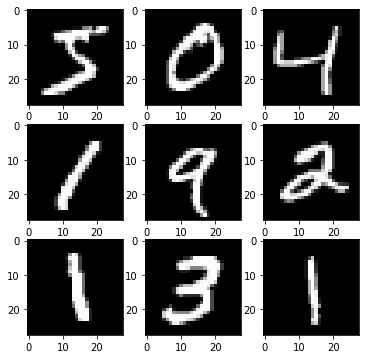

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

#display some images
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))

In [8]:
#display the coresponding label
for i in range(9):
  print(y_train[i],end=" ")
  if (i+1)%3 ==0:
    print("\n")

5 0 4 

1 9 2 

1 3 1 



#Normalize the data

Here we need to flatten the training set and testing set from 28x28 to 1*784


In [9]:
image_size = 28 * 28
x_train = x_train.reshape(x_train.shape[0], image_size)
#copy the set to be used latter
x_train_coopy = x_train
x_train.shape

(60000, 784)

In [10]:
x_test = x_test.reshape(x_test.shape[0],image_size)
#copy the set to be used latter
x_test_copy = x_test
x_test.shape

(10000, 784)

show the label before the encoding for first item in the test set

In [11]:
y_train[0]

5

encoding label (Categorize labels) to 10 classes, which is the number of digits

In [12]:
import keras

num_classes = 10 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

show the label before the encoding for first item in the test set

In [13]:
y_test[0]

7

In [14]:
#Copy the testing labels set
y_test_copy = y_test
y_test = keras.utils.to_categorical(y_test,num_classes)
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#Modeling Random Forest classifier 

build the model

In [15]:
#load random forset classifier
import time
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=3,random_state=85)
#To measure time 
t1 = time.time()
clf_model=clf.fit(x_train,y_train)
t2 = time.time()

time_before_pca = t2-t1
print("Time for Random Forest Classifier before applying PCA {:.1f} seconds".format(time_before_pca))

Time for Random Forest Classifier before applying PCA 57.1 seconds


Test the model using the testing set

In [16]:
prd=clf_model.predict(x_test)
prd[:5]#print the top 5 predictions result

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Random Forest Classifier Accuracy

In [17]:
clf_model.score(x_test,y_test)

0.9058

Print the top 10 Predicted result and the corresponding actual value

In [18]:
import numpy as np

for i in range(10):
  print("Predicted: {} ; Actual {}".format(np.argmax(prd[i]),y_test_copy[i]))

Predicted: 7 ; Actual 7
Predicted: 2 ; Actual 2
Predicted: 1 ; Actual 1
Predicted: 0 ; Actual 0
Predicted: 4 ; Actual 4
Predicted: 1 ; Actual 1
Predicted: 4 ; Actual 4
Predicted: 9 ; Actual 9
Predicted: 0 ; Actual 5
Predicted: 9 ; Actual 9


In [0]:
digits = range(9)

#PCA using Scikit-Learn

we will use the Scikit_learn lib to apply PCA(Principal component analysis) for reducing the dimensiolity of MNIST data set.

In [0]:
#load the original data
pca_x_train = x_train_coopy
pca_x_test = x_test_copy

In [21]:
pca_x_train.shape

(60000, 784)

In [22]:
pca_x_test.shape

(10000, 784)

In [0]:
from sklearn.decomposition import PCA
#reduce the mnist from 784 dimension to dimension that produce 95% varience ration
pca = PCA(n_components=0.95)
#apply the model and apply the reduction on x_train
xd_train = pca.fit_transform(pca_x_train)
#return the reduced dimensionality set to original dimension 784
xd_invers = pca.inverse_transform(xd_train)

In [24]:
xd_train[0]

array([ 1.23932589e+02, -3.12674262e+02, -2.45140518e+01, -5.55757958e+02,
       -2.72966682e+01, -2.32476284e+02,  2.33995733e+02,  1.59799494e+02,
       -3.63515021e+02,  1.98428077e+02,  1.97497025e+02, -2.54055913e+02,
       -1.13496409e+02,  7.49302451e+02,  2.19259554e+02, -4.69324059e+00,
        3.30151992e+02,  3.09153886e+02,  2.77593870e+02,  1.66332371e+02,
        2.75418570e+01, -6.43533073e+01, -2.17178328e+02,  2.50244425e+02,
        4.61660680e+01,  1.00339444e+02, -3.08006769e+02,  1.70105133e+02,
       -1.25514290e+02, -1.23399691e+02, -9.79579471e+01,  3.45751912e+01,
        1.07484335e+02,  8.45984679e+01, -1.52403071e+02,  2.00802897e+02,
        6.52408003e+01,  2.00219128e+02,  1.57660546e+02, -3.59742861e+02,
        1.85587109e+02,  1.54450111e+02, -4.02426309e+01, -8.49658546e+01,
       -1.23869979e+02,  7.08801921e+00,  1.27540799e+02, -7.64373489e+01,
        3.41432681e+01,  1.99862112e+01,  1.30241511e+02, -1.09555383e+02,
       -1.18375522e+02,  

In [25]:
xd_train.shape

(60000, 154)

In [26]:
xd_invers.shape

(60000, 784)

In [27]:
xd_invers

array([[ 2.64687454e-14, -2.44391540e-13,  2.43832979e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.64609603e-15, -1.01751120e-13,  2.86788373e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.28377776e-15,  6.03162394e-14,  2.78027595e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 8.88183138e-15,  2.80203634e-14,  5.80512756e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.07364675e-16,  8.57884465e-14,  1.57395805e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.73667409e-15,  9.61377496e-14, -1.33238344e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

Definitely, there is some loss in information during the projection even after recovering

In [28]:
#this is show the two sets are not equals because of the lossing some dat
np.allclose(xd_invers,pca_x_train)

False

The explained variance ration of PCA

In [29]:
#the explained veriance ration for each feature of the 154
pca_ratio=pca.explained_variance_ratio_
pca_ratio[:5]

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797])

Overall Variance ratio

In [30]:
overall_pca_ratio=pca.explained_variance_ratio_.sum()
print(str(overall_pca_ratio*100)+" %")

95.01960192613032 %


Loss of overall variance ratio

In [31]:
overall_pca_loss = (1 - overall_pca_ratio)*100
print(str(overall_pca_loss)+" %")

4.980398073869674 %


In the below, we will compare the recovered digit with original digit to see how the projection will affect the original. As in the below figure, you can see there are slight difference in the recovered image than the original imaga

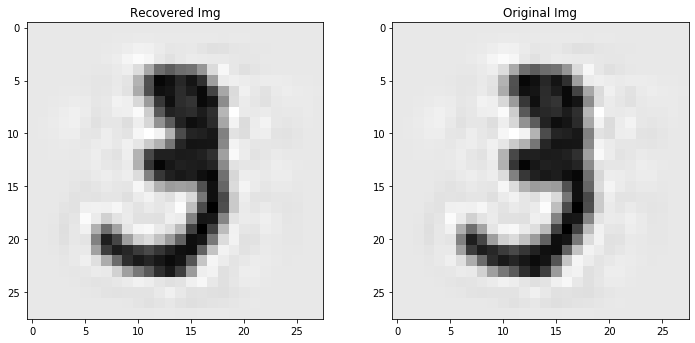

In [32]:
import matplotlib as mpl
xd_reshape = xd_invers.reshape(xd_invers.shape[0],28,28)
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title("Recovered Img")
plt.imshow(xd_reshape[10],cmap=mpl.cm.binary)

pca_x_train_reshape = xd_invers.reshape(pca_x_train.shape[0],28,28)
plt.subplot(2,2,2)
plt.title("Original Img")
plt.imshow(pca_x_train_reshape[10],cmap=mpl.cm.binary)

In [0]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

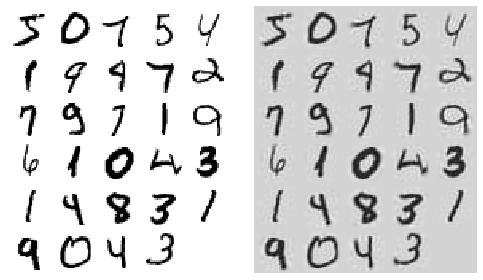

In [34]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(pca_x_train[::2100])
plt.subplot(122)
plot_digits(xd_invers[::2100])
plt.tight_layout()

Scaling training data after reduction

In [35]:
from sklearn import preprocessing

xd_train_scaled = preprocessing.scale(xd_train)
xd_train_scaled

array([[ 0.21485558, -0.63392668, -0.05330353, ...,  1.38044731,
        -0.50610502,  1.0075042 ],
       [ 1.75396433, -0.59780342,  1.29668501, ...,  0.1816869 ,
        -0.31394081, -0.32429588],
       [-0.08988901,  0.7951055 , -0.40989695, ..., -1.35979353,
         1.2217066 , -1.86482058],
       ...,
       [-0.30868215,  0.32454814, -0.56015573, ...,  1.39364127,
         2.21759916, -0.14734156],
       [ 0.22642506, -0.01133729,  1.11733798, ...,  0.58481535,
         0.12757357, -1.66090172],
       [-0.30067703, -0.05011576,  1.20901146, ...,  1.31713449,
         0.31832855, -1.1640139 ]])

Redo Random Forest Classifier with reduced data

build the model

In [36]:
#apply the Random Forest Classifier on reduction trainging set
#to measure time
t1 = time.time()
clf_model_pca=clf.fit(xd_train_scaled,y_train)
t2 = time.time()
time_after_pca = t2-t1
print("Time for Random Forest Classifier after applying PCA {:.1f}".format(time_after_pca))

Time for Random Forest Classifier after applying PCA 160.5


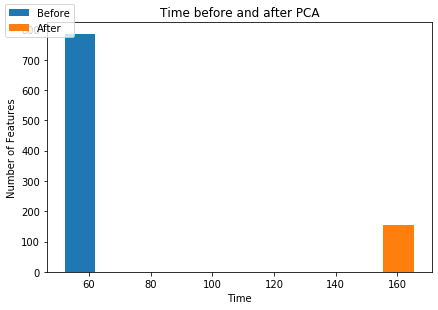

In [37]:
times_before_after_pca=[time_before_pca,time_after_pca]
fig,h=plt.subplots()

h.bar(time_before_pca,height=x_train.shape[1],width=10,label='Before')
h.bar(time_after_pca,height=xd_train.shape[1],width=10,label='After')
fig.legend(loc='upper left')
fig.tight_layout()
h.set_ylabel('Number of Features')
h.set_xlabel('Time')
h.set_title('Time before and after PCA')
fig.show()


reduce the dimensiolity for the testing set

In [38]:
#Testing data before the reduction
pca_x_test.shape

(10000, 784)

In [39]:
#reduce the mnist from 784 dimension to dimension that produce 95% varience ration
pca_test = PCA(n_components=0.95)
#apply the model and apply the reduction on x_train
xd_test = pca_test.fit_transform(pca_x_test)
#Testing data after the reduction
xd_test.shape

(10000, 149)

In [40]:
pca.explained_variance_ratio_

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883895, 0.02762029, 0.02357001,
       0.0210919 , 0.02022991, 0.01715818, 0.01692111, 0.01578641,
       0.01482953, 0.01324561, 0.01276897, 0.01187263, 0.01152684,
       0.01066166, 0.01006713, 0.00953573, 0.00912544, 0.00883405,
       0.00839319, 0.00812579, 0.00786366, 0.00744733, 0.00690859,
       0.00658094, 0.00648148, 0.00602615, 0.00586582, 0.00570021,
       0.00543628, 0.00505786, 0.00487859, 0.00481429, 0.00472266,
       0.00456747, 0.00444836, 0.00418501, 0.00398215, 0.00384975,
       0.00375103, 0.00362009, 0.00351591, 0.00340058, 0.00321874,
       0.00319017, 0.00312805, 0.00295983, 0.00288955, 0.0028413 ,
       0.00271436, 0.00269521, 0.00258473, 0.00253771, 0.00244781,
       0.00240506, 0.00239263, 0.00230408, 0.00221532, 0.00213721,
       0.00207225, 0.00203043, 0.00196783, 0.00192853, 0.00188632,
       0.00186977, 0.00181083, 0.00177562, 0.00174898, 0.00165

In [41]:
pca_test.explained_variance_ratio_.sum()

0.9503231308905666

In [42]:
xd_train_scaled = preprocessing.scale(xd_train)
xd_train_scaled

array([[ 0.21485558, -0.63392668, -0.05330353, ...,  1.38044731,
        -0.50610502,  1.0075042 ],
       [ 1.75396433, -0.59780342,  1.29668501, ...,  0.1816869 ,
        -0.31394081, -0.32429588],
       [-0.08988901,  0.7951055 , -0.40989695, ..., -1.35979353,
         1.2217066 , -1.86482058],
       ...,
       [-0.30868215,  0.32454814, -0.56015573, ...,  1.39364127,
         2.21759916, -0.14734156],
       [ 0.22642506, -0.01133729,  1.11733798, ...,  0.58481535,
         0.12757357, -1.66090172],
       [-0.30067703, -0.05011576,  1.20901146, ...,  1.31713449,
         0.31832855, -1.1640139 ]])

because of the PCA when specify the n_components to 0.95 (for 95 % explained varience ratio), the number of features in the testting set will be 149. So it cause an error when we will predict them in the model. Because the reduced training set had 154 featrues. Both should be matched.

In [43]:
pca.n_components=154
xd_test = pca.fit_transform(pca_x_test)
#Testing data after the reduction
xd_test.shape

(10000, 154)

In [44]:
#explained varience ratio is 95%
pca.explained_variance_ratio_.sum()

0.9522157046166669

In [45]:
xd_test

array([[-4.11260996e+02, -6.86561610e+02, -5.11129462e+01, ...,
         2.21549588e+01,  2.53954586e+01, -5.56311711e+01],
       [ 5.80659352e+01,  9.83170260e+02,  8.88468971e+00, ...,
         3.60713353e+01,  2.24005906e+01,  1.03147987e+01],
       [-9.35105339e+02,  4.59074661e+02,  3.19994509e+02, ...,
        -6.18842586e-01, -5.80759661e+01, -4.43485138e+01],
       ...,
       [-2.82415573e+02, -5.50853516e+02,  1.97570885e+02, ...,
         5.79662634e-01, -4.70679698e+00, -5.05654947e+00],
       [-2.87270866e+02,  1.55851849e+02,  5.36987521e+02, ...,
        -2.48235767e+01,  2.72788850e+01,  8.75495609e+00],
       [ 1.14417000e+03,  2.27198894e+01,  8.49488971e+02, ...,
         2.48417274e+01,  7.73614081e+01,  1.76891360e+01]])

Scaling testting data after reduction

In [46]:
xd_test_scaled = preprocessing.scale(xd_test)
xd_test_scaled

array([[-0.69988954, -1.34837033, -0.11126869, ...,  0.57734653,
         0.66568987, -1.48144086],
       [ 0.0988174 ,  1.93089388,  0.01934124, ...,  0.93999995,
         0.58718554,  0.2746799 ],
       [-1.59137495,  0.90159812,  0.69660182, ..., -0.01612671,
        -1.52234235, -1.18098719],
       ...,
       [-0.48061865, -1.08184689,  0.43009563, ...,  0.0151057 ,
        -0.12337903, -0.13465435],
       [-0.48888146,  0.30608471,  1.16897782, ..., -0.6468893 ,
         0.71506003,  0.23314177],
       [ 1.94716403,  0.04462065,  1.84926787, ...,  0.6473623 ,
         2.02787066,  0.47105621]])

In [47]:
prd_pca=clf_model_pca.predict(xd_test_scaled)
prd_pca[:5]#print the top 5 predictions result

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Random Forest Classifier Accuracy

In [48]:
clf_model_pca.score(xd_test_scaled,y_test)

0.0056

In [49]:
for i in range(10):
  print("Predicted: {} ; Actual {}".format(np.argmax(prd_pca[i]),y_test_copy[i]))

Predicted: 0 ; Actual 7
Predicted: 0 ; Actual 2
Predicted: 0 ; Actual 1
Predicted: 0 ; Actual 0
Predicted: 0 ; Actual 4
Predicted: 0 ; Actual 1
Predicted: 0 ; Actual 4
Predicted: 0 ; Actual 9
Predicted: 0 ; Actual 5
Predicted: 0 ; Actual 9


The accuracy is almost 0%, which is very low and not acceptable

In [50]:
#apply the Random Forest Classifier
clf.random_state=0
clf.max_depth = 70
clf_model_pca=clf.fit(xd_train_scaled,y_train,sample_weight=5)
prd_pca=clf_model_pca.predict(xd_test_scaled)
prd_pca[:5]#print the top 5 predictions result

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [51]:
clf_model_pca.score(xd_test_scaled,y_test)

0.0048

#Applying t-SNE Module

builing t-SNE to reduce the dimensiolity from 784 to 2

reload the data and apply the normalization as we did in the top

In [0]:
#Copy the original data
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [73]:
image_size = 28 * 28
x_train = x_train.reshape(x_train.shape[0], image_size)
#copy the set to be used latter
x_train_coopy = x_train
x_train.shape

(60000, 784)

In [74]:
x_test = x_test.reshape(x_test.shape[0],image_size)
#copy the set to be used latter
x_test_copy = x_test
x_test.shape

(10000, 784)

I tried to run the tSNE on the entire training data 60,000 records but it has never excuted the code even when I left it for more than 5 hours. It seems to run it I need more RAM and Time as it is heavy operation.

So, I will run the code on 1,000 records to run faster.

In [0]:
tsne_x_train = x_train[:1000,:]
tsne_x_test = x_test[:1000,:]

In [104]:
tsne_x_train.shape

(1000, 784)

In [105]:
tsne_x_test.shape

(1000, 784)

In [0]:
tsne_y_train = y_train[:1000]
tsne_y_test = y_test[:1000]

In [107]:
tsne_y_train.shape

(1000,)

In [108]:
tsne_y_test.shape

(1000,)

In [109]:
tsne_x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [110]:
tsne_x_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [111]:
tsne_y_train[0]

5

In [112]:
tsne_y_test[0]

7

In [0]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=42)
tsne_x_train_reduced = tsne.fit_transform(tsne_x_train)
tsne_x_test_reduced = tsne.fit_transform(tsne_x_test)

Check the data after applying tSNE

In [114]:
tsne_x_train_reduced.shape

(1000, 2)

In [115]:
tsne_x_train_reduced[0]

array([-15.668859, -13.853779], dtype=float32)

In [117]:
tsne_x_test_reduced = np.vstack((tsne_x_train_reduced.T,tsne_y_train)).T
tsne_x_test_reduced

array([[-15.668859, -13.853779,   5.      ],
       [-14.389568, -51.05654 ,   0.      ],
       [-17.825314,  35.448936,   4.      ],
       ...,
       [ -7.800721, -44.89403 ,   0.      ],
       [-22.904373, -11.081624,   3.      ],
       [  6.993752, -37.547657,   6.      ]], dtype=float32)

In [120]:
import pandas as pd

tsne_pdf = pd.DataFrame(data=tsne_x_test_reduced, columns=('col1','col2','label'))
tsne_pdf.head()

,col1,col2,label
0,-15.668859,-13.853779,5.0
1,-14.389568,-51.056541,0.0
2,-17.825314,35.448936,4.0
3,22.555698,9.680719,1.0
4,1.181254,29.461842,9.0


Display the scatter plot for the tsne_x_training

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:244: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


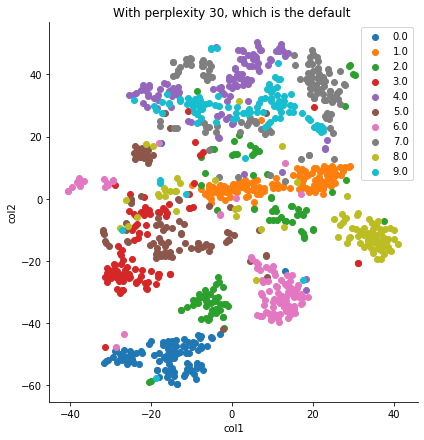

In [137]:
import seaborn as sns

sns.FacetGrid(tsne_pdf,hue='label',size = 6).map(plt.scatter,'col1','col2')
plt.title("With perplexity 30, which is the default ")
plt.legend()
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:244: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


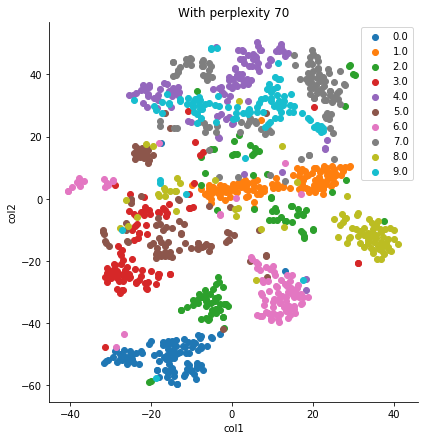

In [135]:
import seaborn as sns

tsne = TSNE(n_components=2, random_state=42,perplexity=70)
tsne_x_train_reduced = tsne.fit_transform(tsne_x_train)
tsne_x_test_reduced = tsne.fit_transform(tsne_x_test)

tsne_x_test_reduced = np.vstack((tsne_x_train_reduced.T,tsne_y_train)).T


sns.FacetGrid(tsne_pdf,hue='label',size = 6).map(plt.scatter,'col1','col2')
plt.title("With perplexity 70")
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:244: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


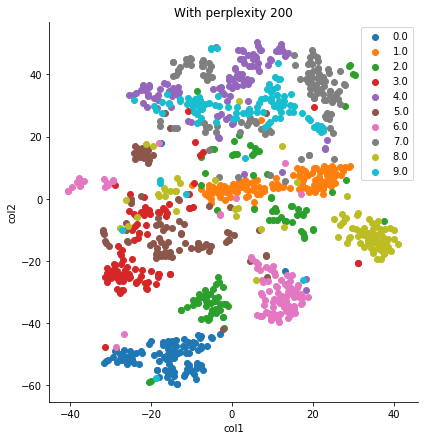

In [136]:
import seaborn as sns

tsne = TSNE(n_components=2, random_state=42,perplexity=200)
tsne_x_train_reduced = tsne.fit_transform(tsne_x_train)
tsne_x_test_reduced = tsne.fit_transform(tsne_x_test)

tsne_x_test_reduced = np.vstack((tsne_x_train_reduced.T,tsne_y_train)).T


sns.FacetGrid(tsne_pdf,hue='label',size = 6).map(plt.scatter,'col1','col2')
plt.title("With perplexity 200")
plt.legend()
plt.show()

Refrences



*   https://github.com/ageron/handson-ml/blob/master08_dimensionality_reduction.ipynb
*   https://scikit-learn.org/
*   https://www.youtube.com/watch?v=eDGWcIt10d8
*   https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

